# Acute Inflammations Dataset
[Link](https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations)

Diagnosis of two diseases of urinary system. It will be
the example of diagnosing of the acute inflammations of urinary bladder and acute nephritises.

Attribute information:

Inputs:
- Temperature of patient : 35C-42C
- Occurrence of nausea : yes/no
- Lumbar pain : yes/no
- Urine pushing (continuous need for urination) : yes/no
- Micturition pains : yes/no
- Burning of urethra, itch, swelling of urethra outlet : yes/no

Outputs:
- decision 1: Inflammation of urinary bladder : yes/no
- decision 2: Nephritis of renal pelvis origin : yes/no

In [0]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [0]:
!pip install ppscore

  Created wheel for ppscore: filename=ppscore-0.0.2-py2.py3-none-any.whl size=9630 sha256=0f42d934bb98ee4fb8c3c726976c6ce22229c6e5d61bc9153ce379d865de3e3e
  Stored in directory: /home/jovyan/.cache/pip/wheels/bb/35/a9/b66dcda859b25d96509b26b47878164067f49ac1feb2a555ac
Successfully built ppscore
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [0]:
import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Load the data

In [0]:
# Load the dataset

from sklearn.model_selection import train_test_split

pd_dat = pd.read_csv('data/diagnosis.csv')
temp_dat=pd_dat
temp_dat.columns=['temperature', 'nausea_occurence', 'lumbar_pain', 'urine_pushing', 
               'micturition_pains', 'bis','inflammation_pred', 'nephritis_pred']
dataset = pd_dat.values

In [0]:
# Build train and test data splits

X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,:6], dataset[:,6:], test_size=0.33)

In [0]:
# Assign training and testing inputs/outputs

temp_train, nocc_train, lumbp_train, up_train, mict_train, bis_train = np.transpose(X_train)
temp_test, nocc_test, lumbp_test, up_test, mict_test, bis_test = np.transpose(X_test)

inflam_train, nephr_train = Y_train[:, 0], Y_train[:, 1]
inflam_test, nephr_test = Y_test[:, 0], Y_test[:, 1]

# Analysis

In [0]:
temp_dat.head()

,temperature,nausea_occurence,lumbar_pain,urine_pushing,micturition_pains,bis,inflammation_pred,nephritis_pred
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0


In [0]:
temp_dat.describe()

,temperature,nausea_occurence,lumbar_pain,urine_pushing,micturition_pains,bis,inflammation_pred,nephritis_pred
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,38.724167,0.241667,0.583333,0.666667,0.491667,0.416667,0.491667,0.416667
std,1.819132,0.429888,0.495074,0.473381,0.502027,0.495074,0.502027,0.495074
min,35.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.950000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,40.600000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,41.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
# Correlation and Predictive-Power Score

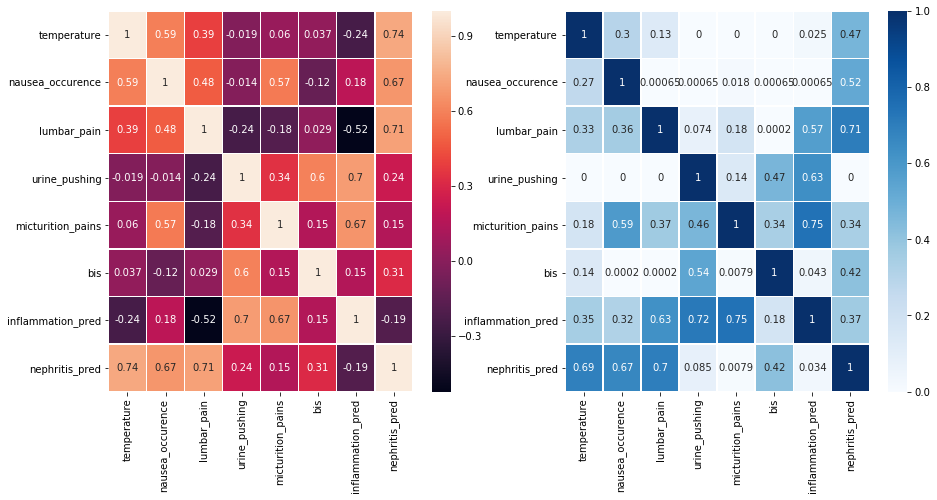

In [0]:
fig, axs = plt.subplots(1, 2,figsize=(15,7))
sns.heatmap(temp_dat.corr(),linewidths=0.5,annot=True,ax=axs[0])
import ppscore as pps
pred_matrix=pps.matrix(temp_dat)
sns.heatmap(pred_matrix, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True,ax=axs[1])
plt.show()

In [0]:
# Data Distribution

(array([70.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0., 50.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

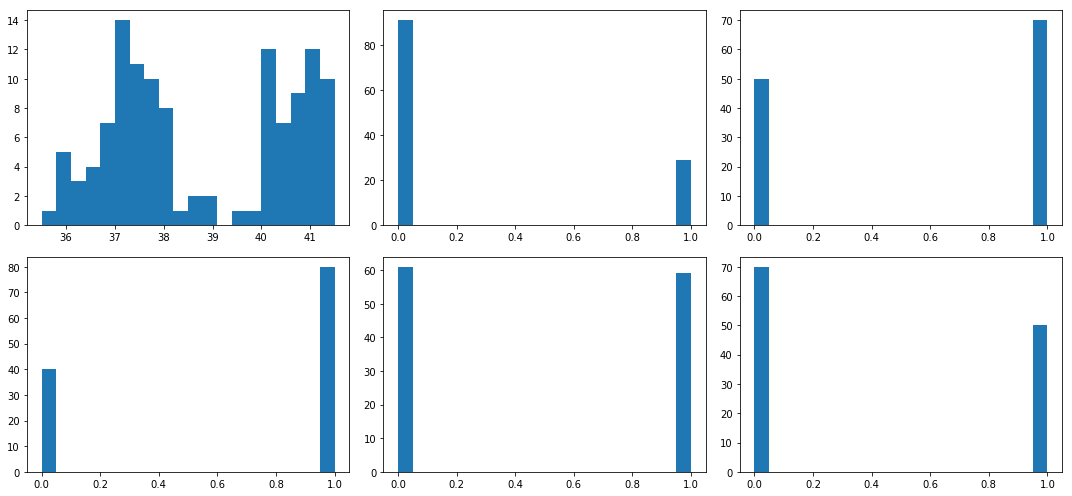

In [0]:
fig, axs = plt.subplots(2,3,figsize=(15,7),tight_layout=True)
axs[0][0].hist(temp_dat['temperature'],bins=20)
axs[0][1].hist(temp_dat['nausea_occurence'],bins=20)
axs[0][2].hist(temp_dat['lumbar_pain'],bins=20)
axs[1][0].hist(temp_dat['urine_pushing'],bins=20)
axs[1][1].hist(temp_dat['micturition_pains'],bins=20)
axs[1][2].hist(temp_dat['bis'],bins=20)

#### Building the model

In [0]:
# Build the input layers
from tensorflow.keras import Input,layers ,Model
input_shape=(1,)
temperature=Input(shape=input_shape,name='temp')
nausea_occurence=Input(shape=input_shape,name='nausea')
lumbar_pain=Input(shape=input_shape,name='lumbar_pain')
urine_pushing=Input(shape=input_shape,name='urine_pushing')
micturition_pains=Input(shape=input_shape,name='mict')
bis=Input(shape=input_shape,name='bis')
list_inputs=[temperature, nausea_occurence, lumbar_pain, urine_pushing, 
               micturition_pains, bis]

In [0]:
# Merge all input features into a single large vector
merged_inputs=layers.concatenate([temperature, nausea_occurence, lumbar_pain, urine_pushing, 
               micturition_pains, bis])

In [0]:
inflammation_pred=layers.Dense(5,activation='relu',name='inflamation_inter')(merged_inputs)
inflammation_pred=layers.Dense(1,activation='sigmoid',name='inflamation_pred')(inflammation_pred)
nephritis_pred=layers.Dense(5,activation='relu',name='nephritis_inter')(merged_inputs)
nephritis_pred=layers.Dense(1,activation='sigmoid',name='nephritis_pred')(nephritis_pred)

In [0]:
# Create the model object
model=Model(inputs=list_inputs,outputs=[inflammation_pred,nephritis_pred])


#### Plotting the model

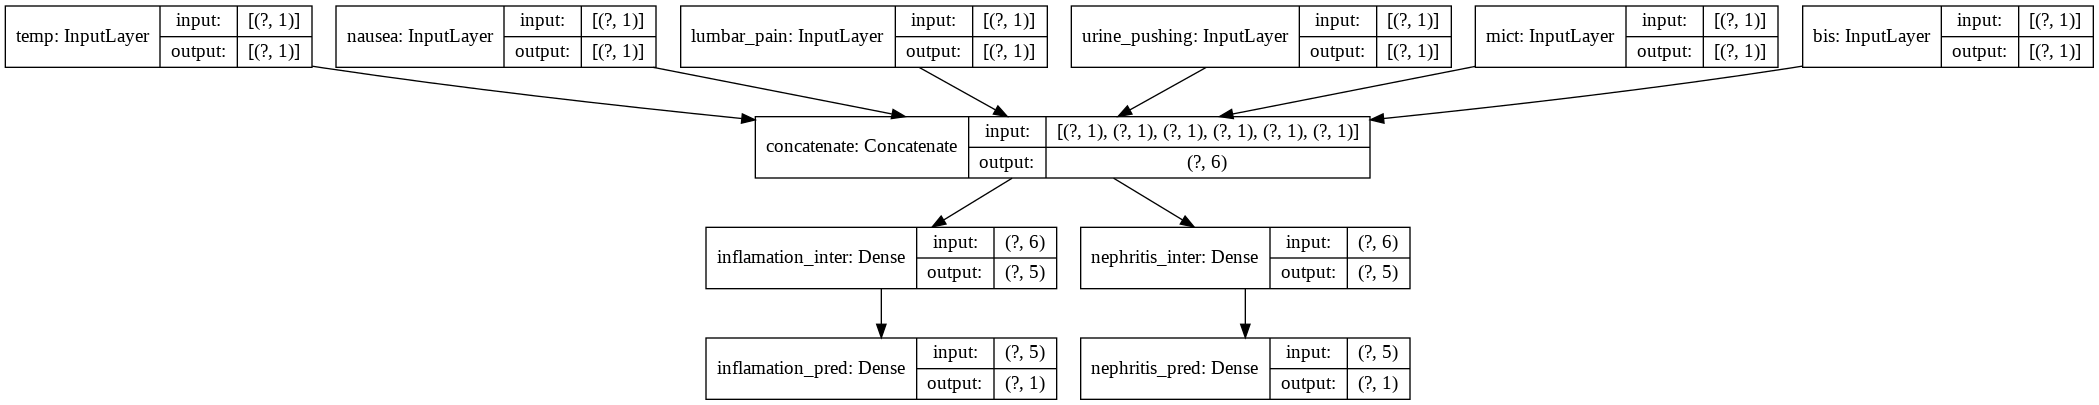

In [0]:
# Display the multiple input/output model
tf.keras.utils.plot_model(model,'Multi_Feature_Inflmmation_Netowrk.png',show_shapes=True)


In [0]:
model.compile(optimizers=tf.keras.optimizers.Adam(),loss={'inflamation_pred':'binary_crossentropy','nephritis_pred':'binary_crossentropy'},
              metrics={'inflamation_pred':['acc'],'nephritis_pred':['acc','mse']},loss_weights=[1.,0.2])

#### Fit the model 

In [0]:
# Define training inputs and outputs

inputs_train = {'temp': temp_train, 'nausea': nocc_train, 'lumbar_pain': lumbp_train,
                'urine_pushing': up_train, 'mict': mict_train, 'bis': bis_train}

outputs_train = {'inflamation_pred': inflam_train, 'nephritis_pred': nephr_train}

In [0]:
# Train the model

history=model.fit(inputs_train,outputs_train,epochs=1500,batch_size=256,verbose=True)

Train on 80 samples
Epoch 1/1500
80/80 [==============================] - 2s 29ms/sample - loss: 5.6941 - inflamation_pred_loss: 4.4710 - nephritis_pred_loss: 6.1156 - inflamation_pred_acc: 0.5000 - nephritis_pred_acc: 0.6000 - nephritis_pred_mse: 0.4000
Epoch 2/1500
80/80 [==============================] - 0s 76us/sample - loss: 5.5737 - inflamation_pred_loss: 4.3811 - nephritis_pred_loss: 5.9627 - inflamation_pred_acc: 0.5000 - nephritis_pred_acc: 0.6000 - nephritis_pred_mse: 0.4000
Epoch 3/1500
80/80 [==============================] - 0s 64us/sample - loss: 5.4872 - inflamation_pred_loss: 4.3167 - nephritis_pred_loss: 5.8521 - inflamation_pred_acc: 0.5000 - nephritis_pred_acc: 0.6000 - nephritis_pred_mse: 0.4000
Epoch 4/1500
80/80 [==============================] - 0s 61us/sample - loss: 5.4153 - inflamation_pred_loss: 4.2633 - nephritis_pred_loss: 5.7597 - inflamation_pred_acc: 0.5000 - nephritis_pred_acc: 0.6000 - nephritis_pred_mse: 0.4000
Epoch 5/1500
80/80 [====================

In [0]:
history.history.keys()

dict_keys(['loss', 'inflamation_pred_loss', 'nephritis_pred_loss', 'inflamation_pred_acc', 'nephritis_pred_acc', 'nephritis_pred_mse'])

#### Plot the learning curves

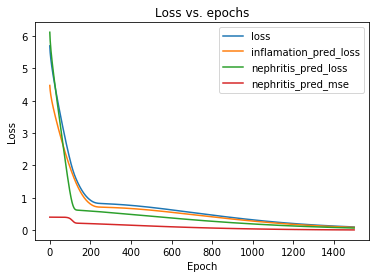

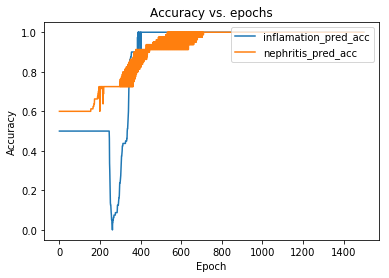

In [0]:
# Plot the training accuracy

acc_keys = [k for k in history.history.keys() if k in ('inflamation_pred_acc', 'nephritis_pred_acc')] 
loss_keys = [k for k in history.history.keys() if not k in acc_keys]

for k, v in history.history.items():
    if k in acc_keys:
        plt.figure(1)
        plt.plot(v)
    else:
        plt.figure(2)
        plt.plot(v)

plt.figure(1)
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(acc_keys, loc='upper right')

plt.figure(2)
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loss_keys, loc='upper right')

plt.show()

In [0]:
# Evaluate the model
model.evaluate([temp_test, nocc_test, lumbp_test, up_test, mict_test, bis_test],[inflam_test,nephr_test])


40/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.10587291866540909, 0.103606775, 0.034425057, 1.0, 1.0, 0.004309124]